# ZTF RRLyrae data

Eric Bellm
January 2020

Programatically retrieve data for use in the RR Lyrae exercise.

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astroquery.vizier import Vizier

[ztfquery](https://github.com/MickaelRigault/ztfquery) provides a convenient interface to the [IRSA ZTF archive](https://irsa.ipac.caltech.edu/Missions/ztf.html).  

Install it with `pip install ztfquery`

In [43]:
from ztfquery import lightcurve

### Retrieve an input RR Lyrae catalog

We are not searching from scratch, but will use the RR Lyrae candidates identified from PanSTARRS1 in [Sesar et al 2017](https://ui.adsabs.harvard.edu/abs/2017AJ....153..204S/abstract), which is in Vizier [here](https://cdsarc.cds.unistra.fr/viz-bin/cat/J/AJ/153/204#/article).

In [5]:
catalog_list = Vizier.find_catalogs('J/AJ/153/204')

In [6]:
catalog_list

OrderedDict([('J/AJ/153/204', </>)])

In [7]:
# retrieve all rows
Vizier.ROW_LIMIT = -1

In [10]:
catalogs = Vizier.get_catalogs(catalog_list.keys())

In [11]:
catalogs

TableList with 4 tables:
	'0:J/AJ/153/204/table5' with 24 column(s) and 239044 row(s) 
	'1:J/AJ/153/204/table2' with 3 column(s) and 100 row(s) 
	'2:J/AJ/153/204/table3' with 3 column(s) and 100 row(s) 
	'3:J/AJ/153/204/table4' with 3 column(s) and 100 row(s) 

In [38]:
tab5 = catalogs[0]

In [45]:
tab5

RAJ2000,DEJ2000,S3ab,S3c,DM,Per,phi0,gAmp,rAmp,iAmp,zAmp,gmag,rmag,imag,zmag,__gmag_,__rmag_,__imag_,__zmag_,E_B-V_,S10,PS1,Sloan,SimbadName
deg,deg,,,mag,d,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,
float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,str3,str5,str29
180.39736,-0.23480,0.56,0.02,15.44,0.6713024354,-0.40301,0.21,0.16,0.12,0.10,15.95,15.80,15.75,15.77,16.09,15.89,15.82,15.82,0.020,0,PS1,Sloan,
179.98457,-0.00105,0.99,0.00,15.90,0.4718074065,-0.18385,1.32,0.98,0.75,0.67,15.72,15.90,16.03,16.12,16.75,16.58,16.55,16.58,0.012,0,PS1,Sloan,[SHM2017] J179.98457-00.00105
180.76635,-0.09688,0.02,0.43,17.22,0.3732300066,-0.11481,0.37,0.26,0.20,0.17,17.86,17.88,17.94,17.99,18.07,18.02,18.04,18.08,0.009,0,PS1,Sloan,
181.91123,-0.75283,0.97,0.00,15.39,0.6724903796,-0.10905,0.36,0.26,0.23,0.21,15.80,15.68,15.64,15.66,16.03,15.83,15.76,15.77,0.018,0,PS1,Sloan,[SHM2017] J181.91123-00.75283
181.21252,-0.35182,0.02,0.93,16.22,0.3766741377,0.11333,0.51,0.35,0.29,0.25,16.86,16.85,16.87,16.92,17.15,17.05,17.04,17.06,0.009,0,PS1,Sloan,[SHM2017] J181.21252-00.35182
182.29351,-0.79973,0.99,0.00,16.96,0.6382028695,-0.37554,1.06,0.77,0.61,0.54,16.83,16.90,16.99,17.05,17.59,17.41,17.37,17.38,0.047,0,PS1,Sloan,[SHM2017] J182.29351-00.79973
182.13071,-0.78830,0.99,0.00,16.25,0.5931475116,-0.42739,0.90,0.65,0.51,0.45,16.29,16.33,16.42,16.43,16.92,16.75,16.71,16.70,0.051,0,PS1,Sloan,[SHM2017] J182.13071-00.78830
180.19977,0.76976,0.01,0.11,16.36,0.3268700709,-0.40827,0.32,0.23,0.18,0.15,17.03,17.10,17.19,17.26,17.21,17.23,17.29,17.34,0.044,0,PS1,Sloan,


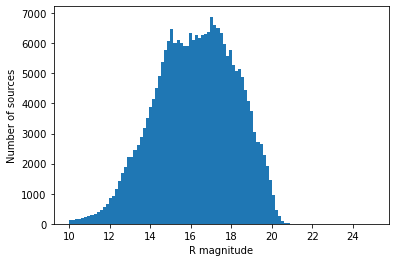

In [66]:
plt.hist(tab5['rmag'],bins=np.linspace(10,25,100))
plt.xlabel('R magnitude')
_=plt.ylabel('Number of sources')

So ZTF should have reasonable coverage of most of these sources.

We are going to take a random subset of the rows.

In [46]:
rng = np.random.default_rng(seed=42)

In [49]:
random_rows = rng.integers(0,len(tab5),1000)
random_rows[:10]

array([ 14835,  95025, 109544, 190728,  30843, 103759,  36412, 188279,
       151143, 118742])

In [50]:
tab5[random_rows]

RAJ2000,DEJ2000,S3ab,S3c,DM,Per,phi0,gAmp,rAmp,iAmp,zAmp,gmag,rmag,imag,zmag,__gmag_,__rmag_,__imag_,__zmag_,E_B-V_,S10,PS1,Sloan,SimbadName
deg,deg,,,mag,d,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,
float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,str3,str5,str29
231.16489,-25.10317,0.98,0.00,16.31,0.4605891954,0.47467,1.34,1.03,0.82,0.74,16.00,16.24,16.41,16.56,17.05,16.97,16.98,17.07,0.257,0,PS1,Sloan,[SHM2017] J231.16489-25.10317
330.28898,37.36158,0.93,0.00,19.42,0.6128307814,-0.46747,1.05,0.71,0.58,0.56,19.48,19.52,19.54,19.58,20.21,19.95,19.86,19.89,0.126,0,PS1,Sloan,[SHM2017] J330.28898+37.36158
296.17461,-3.58758,0.51,0.03,15.62,0.6634817782,0.00962,0.59,0.43,0.34,0.32,15.89,15.80,15.82,15.83,16.28,16.05,16.00,16.00,0.369,0,PS1,Sloan,
85.04403,-21.57030,0.01,0.01,17.58,0.4985459269,-0.16067,0.52,0.36,0.30,0.31,18.18,18.05,18.01,18.04,18.51,18.24,18.18,18.22,0.027,0,PS1,Sloan,
312.40008,85.48132,1.00,0.00,17.58,0.5805258934,0.24048,0.97,0.71,0.58,0.51,17.67,17.69,17.73,17.78,18.38,18.13,18.06,18.07,0.114,0,PS1,Sloan,[SHM2017] J312.40008+85.48132
283.45977,-10.82647,0.02,0.01,14.48,0.7628751093,-0.19748,0.29,0.22,0.16,0.17,14.83,14.68,14.67,14.65,15.01,14.80,14.75,14.74,0.445,0,PS1,Sloan,
127.29134,-27.93160,0.03,0.03,14.86,0.5831541959,0.45269,0.44,0.31,0.26,0.26,15.36,15.23,15.19,15.23,15.64,15.40,15.34,15.37,0.138,0,PS1,Sloan,
332.54510,37.12422,0.02,0.41,18.03,0.3598258178,0.28581,0.48,0.30,0.27,0.21,18.75,18.77,18.73,18.75,19.02,18.93,18.88,18.86,0.138,0,PS1,Sloan,


In [67]:
tab5[random_rows].write('../data/ztf_rrl_lightcurves/tab5_subset_all.csv')

ImportError: cannot import name pprint

In [55]:
astropy.table.Table.write.list_formats()

           Format           Read Write Auto-identify Deprecated
--------------------------- ---- ----- ------------- ----------
                      ascii  Yes   Yes            No           
               ascii.aastex  Yes   Yes            No           
                ascii.basic  Yes   Yes            No           
     ascii.commented_header  Yes   Yes            No           
                  ascii.csv  Yes   Yes           Yes           
                 ascii.ecsv  Yes   Yes           Yes           
           ascii.fast_basic  Yes   Yes            No           
ascii.fast_commented_header  Yes   Yes            No           
             ascii.fast_csv  Yes   Yes            No           
       ascii.fast_no_header  Yes   Yes            No           
             ascii.fast_rdb  Yes   Yes            No           
             ascii.fast_tab  Yes   Yes            No           
          ascii.fixed_width  Yes   Yes            No           
ascii.fixed_width_no_header  Yes   Yes  

In [54]:
import astropy

In [64]:
astropy.test()

============================= test session starts ==============================
platform darwin -- Python 3.9.7, pytest-6.2.5, py-1.11.0, pluggy-0.13.1

Running tests with Astropy version 5.0.
Running tests in mambaforge/lib/python3.9/site-packages/astropy.

Date: 2022-01-25T22:17:45

Platform: macOS-12.0.1-arm64-arm-64bit

Executable: /Users/ebellm/mambaforge/bin/python

Full Python Version: 
3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:24:02) 
[Clang 11.1.0 ]

encodings: sys: utf-8, locale: UTF-8, filesystem: utf-8
byteorder: little
float info: dig: 15, mant_dig: 15

Package versions: 
Numpy: 1.22.0
Scipy: 1.7.3
Matplotlib: 3.5.1
h5py: not available
Pandas: 1.3.5
PyERFA: 2.0.0.1
Cython: 0.29.26
Scikit-image: not available
asdf: not available

Using Astropy options: remote_data: none.

rootdir: /Users/ebellm
plugins: remotedata-0.3.3, doctestplus-0.11.2, arraydiff-0.3, mock-3.6.1, filter-subpackage-0.1.1, openfiles-0.5.0, hypothesis-6.36.0, astropy-header-0.1.2, cov-3.

<ExitCode.INTERRUPTED: 2>

In [21]:
lcq = lightcurve.LCQuery.from_position(185.33612, -1.40382, 5)

In [22]:
lcq

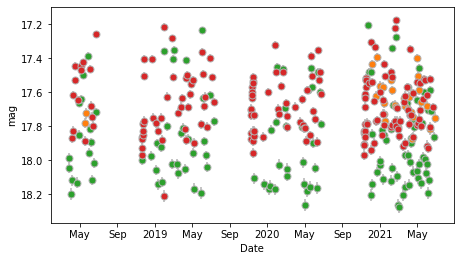

In [23]:
lcq.show()

In [27]:
lcq.to_parquet('tmp.parquet')